In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [5]:
from tensorflow.keras.preprocessing import image

In [2]:
DATADIR = 'D:/Study/doancn/FireNet/Codes/Datasets/'
CATEGORIES = ['Fire', 'NoFire']

In [8]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [8]:
for i in range(0,6):
    print(i)

0
1
2
3
4
5


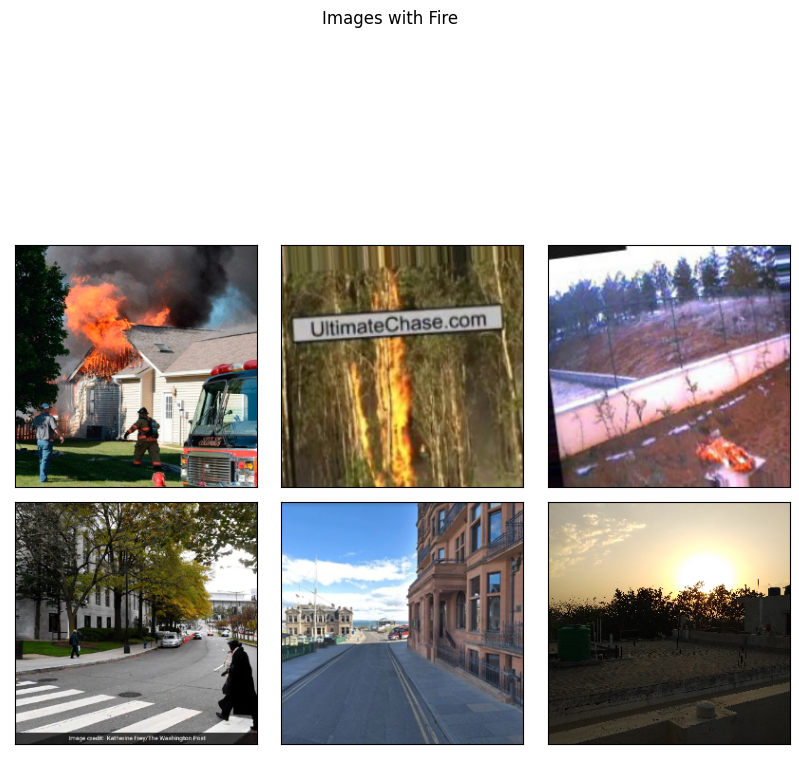

In [16]:
from matplotlib import pyplot as plt
pics = 6 #set the number of pics
fig,ax = plt.subplots(2,int(pics//2),figsize=(10,10))
plt.suptitle('Images with Fire')
plt.subplots_adjust(wspace=0.1, hspace=-0.5)
ax = ax.ravel()
for i in range((pics//2)):
    path = os.path.join(DATADIR,'Fire')
    i=0
    for img in os.listdir(path):
        img = image.load_img(os.path.join(path,img))
        img = image.smart_resize(img,(256,256))
        img = image.img_to_array(img)/255
        ax[i].imshow(img)
        ax[i].axes.xaxis.set_visible(False)
        ax[i].axes.yaxis.set_visible(False)
        i=i+1
        if i==3:
            break
for i in range((pics//2)):
    path = os.path.join(DATADIR,'NoFire')
    i=3
    for img in os.listdir(path):
        img = image.load_img(os.path.join(path,img))
        img = image.smart_resize(img,(256,256))
        img = image.img_to_array(img)/255
        ax[i].imshow(img)
        ax[i].axes.xaxis.set_visible(False)
        ax[i].axes.yaxis.set_visible(False)
        i=i+1
        if i==6:
            break

In [10]:
training_data = create_training_data()


100%|██████████| 1301/1301 [00:18<00:00, 68.66it/s] 


In [12]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

2423
0
0
1
0
0
0
0
1
0
1


In [13]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]
Y=np.array(Y)

In [7]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [15]:
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)


Epoch 1/100
53/53 [==============================] - 7s 106ms/step - loss: 0.6161 - accuracy: 0.6745 - val_loss: 0.5524 - val_accuracy: 0.7249
Epoch 2/100
53/53 [==============================] - 4s 82ms/step - loss: 0.4969 - accuracy: 0.7642 - val_loss: 0.4732 - val_accuracy: 0.7772
Epoch 3/100
53/53 [==============================] - 4s 71ms/step - loss: 0.4622 - accuracy: 0.7972 - val_loss: 0.5213 - val_accuracy: 0.7400
Epoch 4/100
53/53 [==============================] - 4s 80ms/step - loss: 0.4456 - accuracy: 0.8025 - val_loss: 0.5323 - val_accuracy: 0.7359
Epoch 5/100
53/53 [==============================] - 4s 76ms/step - loss: 0.4319 - accuracy: 0.8025 - val_loss: 0.4457 - val_accuracy: 0.7840
Epoch 6/100
53/53 [==============================] - 4s 75ms/step - loss: 0.4079 - accuracy: 0.8202 - val_loss: 0.4235 - val_accuracy: 0.7909
Epoch 7/100
53/53 [==============================] - 4s 68ms/step - loss: 0.3919 - accuracy: 0.8190 - val_loss: 0.4512 - val_accuracy: 0.7937
Epoch

In [16]:
model.save('TrainedModels/Fire.h5')

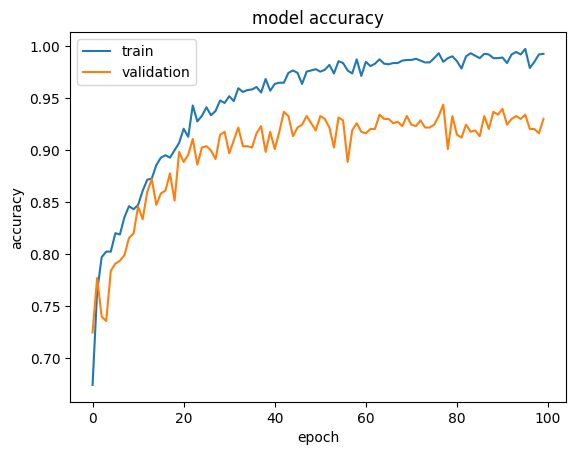

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

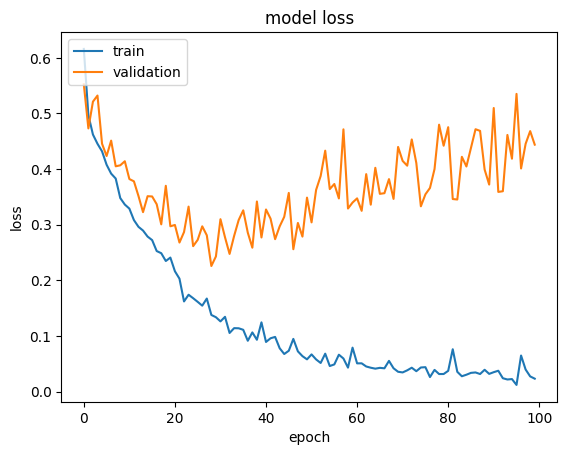

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
model = tf.keras.models.load_model('TrainedModels/Fire.h5')

# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                   verbose=1)

In [ ]:
# plot_model(model, to_file='model_small.svg', show_layer_names=False, show_shapes=True)

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 16)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0